In [66]:
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn import svm
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

## Đọc dữ liệu tập huấn luyện và tập validation vào data frame

In [67]:
train_df = pd.DataFrame.from_csv('train.csv')
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3250 entries, The Dark Knight Rises to In the Cut
Data columns (total 20 columns):
language                     3227 non-null object
genres                       3246 non-null object
num_user_for_reviews         3202 non-null float64
num_critic_for_reviews       3200 non-null float64
cast_total_facebook_likes    3250 non-null int64
color                        3223 non-null object
country                      3225 non-null object
facenumber_in_poster         3229 non-null float64
content_rating               3151 non-null object
budget                       3052 non-null float64
title_year                   3147 non-null float64
duration                     3218 non-null float64
num_voted_users              3212 non-null float64
imdb_score                   3212 non-null float64
aspect_ratio                 3164 non-null float64
actor_2_facebook_likes       3226 non-null float64
movie_facebook_likes         3250 non-null int64
actor_3_facebo

C:\Users\HP EliteBook\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


,language,genres,num_user_for_reviews,num_critic_for_reviews,cast_total_facebook_likes,color,country,facenumber_in_poster,content_rating,budget,title_year,duration,num_voted_users,imdb_score,aspect_ratio,actor_2_facebook_likes,movie_facebook_likes,actor_3_facebook_likes,director_facebook_likes,actor_1_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,
The Dark Knight Rises,English,Action|Thriller,2734.0,816.0,128886,Color,UK,0.0,PG-13,250000000.0,2012.0,164.0,1223907.0,8.5,2.35,23000.0,163000,23000.0,22000.0,27000.0
Pirates of the Caribbean: At World's End,English,Action|Adventure|Fantasy,1249.0,307.0,73135,Color,USA,1.0,PG-13,300000000.0,2007.0,169.0,500631.0,7.1,2.35,7700.0,5300,5000.0,575.0,40000.0
Avatar,English,Action|Adventure|Fantasy|Sci-Fi,3087.0,722.0,36289,Color,UK,1.0,PG-13,237000000.0,2009.0,162.0,936212.0,7.8,1.78,8200.0,34000,5300.0,7000.0,8500.0
The Lone Ranger,English,Action|Adventure|Western,723.0,460.0,67106,Color,USA,2.0,PG-13,215000000.0,2013.0,150.0,191086.0,6.5,2.35,7700.0,48000,6000.0,575.0,40000.0
Spectre,English,Action|Adventure|Thriller,1033.0,633.0,45755,Color,UK,1.0,PG-13,245000000.0,2015.0,148.0,309354.0,6.8,2.35,8700.0,88000,8500.0,2200.0,11000.0


In [69]:
val_df = pd.read_csv('val.csv', index_col=0)
val_df.info()
val_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1083 entries, Charlie Bartlett to In the Name of the King: The Last Job
Data columns (total 20 columns):
language                     1074 non-null object
genres                       1082 non-null object
num_user_for_reviews         1067 non-null float64
num_critic_for_reviews       1064 non-null float64
cast_total_facebook_likes    1083 non-null int64
color                        1074 non-null object
country                      1078 non-null object
facenumber_in_poster         1076 non-null float64
content_rating               1006 non-null object
budget                       925 non-null float64
title_year                   1050 non-null float64
duration                     1073 non-null float64
num_voted_users              1074 non-null float64
imdb_score                   1074 non-null float64
aspect_ratio                 1003 non-null float64
actor_2_facebook_likes       1081 non-null float64
movie_facebook_likes         1083 non-null

,language,genres,num_user_for_reviews,num_critic_for_reviews,cast_total_facebook_likes,color,country,facenumber_in_poster,content_rating,budget,title_year,duration,num_voted_users,imdb_score,aspect_ratio,actor_2_facebook_likes,movie_facebook_likes,actor_3_facebook_likes,director_facebook_likes,actor_1_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,
Charlie Bartlett,English,Comedy|Drama|Romance,124.0,147.0,34163,Color,USA,5.0,R,1.200000e+07,2007.0,97.0,58114.0,7.0,1.85,6100.0,3700,5400.0,20.0,21000.0
Two Lovers,English,Drama|Romance,99.0,190.0,10179,Color,USA,0.0,R,1.200000e+07,2008.0,110.0,30904.0,7.1,2.35,4200.0,2900,831.0,122.0,4400.0
The Great Beauty,Italian,Drama,128.0,284.0,467,Color,Italy,2.0,Not Rated,9.200000e+06,2013.0,141.0,61483.0,7.7,2.35,102.0,30000,71.0,708.0,211.0
Last Orders,English,Drama,99.0,60.0,17548,Color,UK,5.0,R,1.200000e+07,2001.0,109.0,5161.0,7.0,2.35,5000.0,314,3000.0,43.0,5700.0
The Host,Korean,Comedy|Drama|Horror|Sci-Fi,282.0,366.0,1218,Color,South Korea,0.0,R,1.221550e+10,2006.0,120.0,73623.0,7.0,1.85,406.0,7500,75.0,597.0,660.0


In [70]:
test_df = pd.read_csv('test.csv', index_col=0)
test_df.info()
test_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1086 entries, Wicked Blood to A Plague So Pleasant
Data columns (total 20 columns):
language                     1076 non-null object
genres                       1084 non-null object
num_user_for_reviews         1048 non-null float64
num_critic_for_reviews       1024 non-null float64
cast_total_facebook_likes    1086 non-null int64
color                        1074 non-null object
country                      1079 non-null object
facenumber_in_poster         1070 non-null float64
content_rating               884 non-null object
budget                       887 non-null float64
title_year                   1060 non-null float64
duration                     1069 non-null float64
num_voted_users              1062 non-null float64
imdb_score                   1062 non-null float64
aspect_ratio                 855 non-null float64
actor_2_facebook_likes       1068 non-null float64
movie_facebook_likes         1086 non-null int64
actor_3_facebook

,language,genres,num_user_for_reviews,num_critic_for_reviews,cast_total_facebook_likes,color,country,facenumber_in_poster,content_rating,budget,title_year,duration,num_voted_users,imdb_score,aspect_ratio,actor_2_facebook_likes,movie_facebook_likes,actor_3_facebook_likes,director_facebook_likes,actor_1_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,
Wicked Blood,English,Action|Crime|Drama|Thriller,11.0,7.0,15939,Color,USA,2.0,Not Rated,3500000.0,2014.0,92.0,2085.0,5.4,1.85,3500.0,490,2000.0,14.0,6400.0
The Tall Man,English,Crime|Drama|Horror|Mystery|Thriller,189.0,174.0,7230,Color,USA,1.0,R,18200000.0,2012.0,106.0,33131.0,5.9,2.35,1800.0,12000,428.0,74.0,4300.0
Dawn Patrol,English,Drama|Thriller,14.0,9.0,8181,Color,NaN,1.0,NaN,3500000.0,2014.0,88.0,523.0,4.7,2.35,2300.0,584,796.0,20.0,3300.0
Lords of London,English,Crime|Mystery|Thriller,18.0,3.0,1213,Color,UK,1.0,R,3440000.0,2014.0,90.0,640.0,3.2,2.35,70.0,609,45.0,0.0,1000.0
Taxman,English,Action|Comedy|Crime|Thriller,20.0,5.0,7169,Color,USA,6.0,R,1000000.0,1998.0,104.0,383.0,5.5,1.37,1200.0,18,965.0,6.0,3500.0


## Tiền xử lý

**1. Tiền xử lý tập huấn luyện**

In [71]:
train_input_df = train_df.iloc[:, 0:]
train_output_df = train_df.imdb_score

**1.1. Xây dựng `train_X` từ `train_input_df`**

In [72]:
dropped_cols = ['aspect_ratio', 'imdb_score', 'genres','language', 'country', 'content_rating', 'num_user_for_reviews', 'num_critic_for_reviews', 'num_voted_users']
train_input_df.drop(dropped_cols, axis=1, inplace=True)
train_input_df.info()
train_input_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3250 entries, The Dark Knight Rises to In the Cut
Data columns (total 11 columns):
cast_total_facebook_likes    3250 non-null int64
color                        3223 non-null object
facenumber_in_poster         3229 non-null float64
budget                       3052 non-null float64
title_year                   3147 non-null float64
duration                     3218 non-null float64
actor_2_facebook_likes       3226 non-null float64
movie_facebook_likes         3250 non-null int64
actor_3_facebook_likes       3223 non-null float64
director_facebook_likes      3162 non-null float64
actor_1_facebook_likes       3238 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 304.7+ KB


,cast_total_facebook_likes,color,facenumber_in_poster,budget,title_year,duration,actor_2_facebook_likes,movie_facebook_likes,actor_3_facebook_likes,director_facebook_likes,actor_1_facebook_likes
movie_title,,,,,,,,,,,
The Dark Knight Rises,128886,Color,0.0,250000000.0,2012.0,164.0,23000.0,163000,23000.0,22000.0,27000.0
Pirates of the Caribbean: At World's End,73135,Color,1.0,300000000.0,2007.0,169.0,7700.0,5300,5000.0,575.0,40000.0
Avatar,36289,Color,1.0,237000000.0,2009.0,162.0,8200.0,34000,5300.0,7000.0,8500.0
The Lone Ranger,67106,Color,2.0,215000000.0,2013.0,150.0,7700.0,48000,6000.0,575.0,40000.0
Spectre,45755,Color,1.0,245000000.0,2015.0,148.0,8700.0,88000,8500.0,2200.0,11000.0


In [73]:
train_input_df['cast_total_facebook_likes'] = train_input_df['cast_total_facebook_likes'].astype(np.float64)
train_input_df['movie_facebook_likes'] = train_input_df['movie_facebook_likes'].astype(np.float64)

In [74]:
def compute_mean_mode(train_input_df):
    # TODO
    df = train_input_df.select_dtypes(exclude=['object'])
    mean_mode_dict = {}
    
    for column in df:
        mean_mode_dict[column] = df[column].mean()
    
    df = train_input_df.select_dtypes(include=['object'])
    for column in df:
        mean_mode_dict[column] = df[column].mode()[0]
    
    return mean_mode_dict

In [75]:
mean_mode_dict = compute_mean_mode(train_input_df)
mean_mode_dict

{'cast_total_facebook_likes': 24097.719384615386,
 'facenumber_in_poster': 1.5627129142149272,
 'budget': 61152055.27686763,
 'title_year': 2004.1617413409597,
 'duration': 110.09384711000621,
 'actor_2_facebook_likes': 4802.207067575945,
 'movie_facebook_likes': 12749.517846153845,
 'actor_3_facebook_likes': 2827.464784362395,
 'director_facebook_likes': 1452.6944971537002,
 'actor_1_facebook_likes': 10682.169240271773,
 'color': 'Color'}

In [76]:
def fill_missing_values(input_df, mean_mode_dict):
    '''
    Fills missing values for ALL columns of `input_df` using `mean_mode_dict`.
    
    Parameters
    ----------
    input_df : data frame
        The data frame containing inputs.
    mean_mode_dict : dictionary
        mean_mode_dict[<column_name>] = mean/mode of this column (estimated from the training set).
    
    Returns
    -------
    filled_input_df : data frame
        The data frame containing inputs after filling missing values.
    '''
    
    filled_input_df = input_df
    
    # TODO
    for column in input_df:
        for key in mean_mode_dict:
            if key == column:
                filled_input_df[column].fillna(mean_mode_dict[key], inplace=True)
    return filled_input_df

In [77]:
# Fill and check the result
train_input_df = fill_missing_values(train_input_df, mean_mode_dict)
print(train_input_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3250 entries, The Dark Knight Rises to In the Cut
Data columns (total 11 columns):
cast_total_facebook_likes    3250 non-null float64
color                        3250 non-null object
facenumber_in_poster         3250 non-null float64
budget                       3250 non-null float64
title_year                   3250 non-null float64
duration                     3250 non-null float64
actor_2_facebook_likes       3250 non-null float64
movie_facebook_likes         3250 non-null float64
actor_3_facebook_likes       3250 non-null float64
director_facebook_likes      3250 non-null float64
actor_1_facebook_likes       3250 non-null float64
dtypes: float64(10), object(1)
memory usage: 304.7+ KB
None


In [78]:
train_output_df.head()

movie_title
The Dark Knight Rises                       8.5
Pirates of the Caribbean: At World's End    7.1
Avatar                                      7.8
The Lone Ranger                             6.5
Spectre                                     6.8
Name: imdb_score, dtype: float64

In [79]:
def process_categorical_cols(input_df):
    # TODO
    numeric_input_df = input_df
    df = (input_df.color.str.get_dummies()) #one hot.
    numeric_input_df['Color'] = df['Color'].astype(float)
    #drop:
    numeric_input_df = numeric_input_df.drop('color', axis=1)
    return numeric_input_df

In [80]:
train_input_df = process_categorical_cols(train_input_df)
train_input_df.info()
print
train_input_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3250 entries, The Dark Knight Rises to In the Cut
Data columns (total 11 columns):
cast_total_facebook_likes    3250 non-null float64
facenumber_in_poster         3250 non-null float64
budget                       3250 non-null float64
title_year                   3250 non-null float64
duration                     3250 non-null float64
actor_2_facebook_likes       3250 non-null float64
movie_facebook_likes         3250 non-null float64
actor_3_facebook_likes       3250 non-null float64
director_facebook_likes      3250 non-null float64
actor_1_facebook_likes       3250 non-null float64
Color                        3250 non-null float64
dtypes: float64(11)
memory usage: 304.7+ KB


,cast_total_facebook_likes,facenumber_in_poster,budget,title_year,duration,actor_2_facebook_likes,movie_facebook_likes,actor_3_facebook_likes,director_facebook_likes,actor_1_facebook_likes,Color
movie_title,,,,,,,,,,,
The Dark Knight Rises,128886.0,0.0,250000000.0,2012.0,164.0,23000.0,163000.0,23000.0,22000.0,27000.0,1.0
Pirates of the Caribbean: At World's End,73135.0,1.0,300000000.0,2007.0,169.0,7700.0,5300.0,5000.0,575.0,40000.0,1.0
Avatar,36289.0,1.0,237000000.0,2009.0,162.0,8200.0,34000.0,5300.0,7000.0,8500.0,1.0
The Lone Ranger,67106.0,2.0,215000000.0,2013.0,150.0,7700.0,48000.0,6000.0,575.0,40000.0,1.0
Spectre,45755.0,1.0,245000000.0,2015.0,148.0,8700.0,88000.0,8500.0,2200.0,11000.0,1.0


In [81]:
train_X = train_input_df.values
print(train_X.shape)

(3250, 11)


In [82]:
# TODO: compute `X_mean` and `X_std`
X_mean = train_X.mean(axis=0)
X_std = train_X.std(axis=0)

In [83]:
print(X_mean)
print(X_std)

[2.40977194e+04 1.56271291e+00 6.11520553e+07 2.00416174e+03
 1.10093847e+02 4.80220707e+03 1.27495178e+04 2.82746478e+03
 1.45269450e+03 1.06821692e+04 9.70769231e-01]
[2.32908734e+04 2.50614940e+00 4.95108248e+08 9.28719008e+00
 2.34975197e+01 4.66785096e+03 2.31846121e+04 2.61196075e+03
 3.47488979e+03 1.62019777e+04 1.68452757e-01]


In [84]:
# TODO: normalize train_X using X_mean and X_std
for i in range(train_X.shape[0]):
    for j in range(train_X.shape[1]):
        train_X[i][j] =  (train_X[i][j]-X_mean[j])/X_std[j]

In [85]:
print(train_X.mean(axis=0))
print(train_X.std(axis=0))

[-5.24708482e-17  9.61965550e-17 -4.37257068e-18 -2.81593552e-14
  2.53609100e-16  6.99611309e-17  3.49805655e-17  3.49805655e-17
 -8.74514136e-17  0.00000000e+00  3.64016509e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [86]:
# Add x_0 column
train_X = np.hstack([np.ones((len(train_X), 1)), train_X])
print(train_X.shape)

(3250, 12)


**1.1. Xây dựng train Y từ train_output_df**

In [87]:
train_output_df.fillna(train_output_df.mean(), inplace=True)
train_Y = train_output_df.values.reshape(-1, 1)
print(train_Y.shape)
print(train_Y)

(3250, 1)
[[8.5]
 [7.1]
 [7.8]
 ...
 [5. ]
 [4.7]
 [5.3]]


In [92]:
print(train_X.shape)

regr = linear_model.LinearRegression()
regr.fit(train_X, train_Y)

y_pred = regr.predict(train_X)
print(y_pred)

(3250, 12)
[[9.69331811]
 [6.70810318]
 [7.30096606]
 ...
 [6.29349714]
 [5.90494757]
 [6.80705368]]


In [97]:
# Xây dựng tập test

In [94]:
test_input_df = test_df.iloc[:, 0:]
test_output_df = test_df.imdb_score

test_X = process_new_input_df(test_input_df, dropped_cols, mean_mode_dict, X_mean, X_std)
test_X.shape


(1086, 12)

In [95]:
test_output_df.fillna(train_output_df.mean(), inplace=True)
test_Y = test_output_df.values.reshape(-1, 1)
test_Y.shape

(1086, 1)

(3250, 12)
[[5.84741322]
 [6.16892421]
 [5.81550843]
 ...
 [5.77885311]
 [5.99737075]
 [5.71340053]]


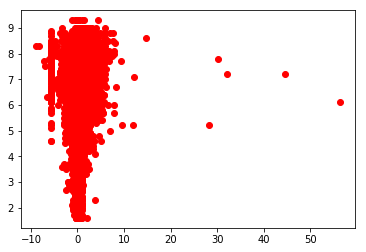

In [102]:
print(train_X.shape)

regr = linear_model.LinearRegression()
regr.fit(train_X, train_Y)

y_pred = regr.predict(test_X)
print(y_pred)
plt.plot(train_X, train_Y, 'ro', label='Original data')


In [99]:
from sklearn.linear_model import Ridge

np.random.seed(42)
param_grid = {'alpha':np.linspace(0,15, 30)}
#uncomment next line for grid search
#TuneHyp(X, y, model = Ridge(), param_grid = param_grid, scoring = 'neg_mean_squared_error', cvn = 5)


In [101]:
rdg = Ridge(alpha = 12.017241379310345)
rdg.fit(train_X, train_Y)
y_rdg = np.expm1(rdg.predict(test_X))
print(y_rdg)

[[345.95898446]
 [476.17188652]
 [335.17869548]
 ...
 [322.85288287]
 [401.6406697 ]
 [302.54828608]]


**2. Tiền xử lí tập Validation**

In [88]:
val_input_df = val_df.iloc[:, 0:]
val_output_df = val_df.imdb_score
#val_out_df = fill_missing_values(val_output_df, mean_mode_dict)
#val_input_df = val_input_df.drop('imdb_score', 1)

**2.1. Xây dựng val_X từ val_input_df**

In [35]:
def process_new_input_df(new_input_df, dropped_cols, mean_mode_dict, X_mean, X_std):
    # TODO
    new_input_df.drop(dropped_cols, axis=1, inplace=True)
    new_input_df['cast_total_facebook_likes'] = new_input_df['cast_total_facebook_likes'].astype(np.float64)
    new_input_df['movie_facebook_likes'] = new_input_df['movie_facebook_likes'].astype(np.float64)
    new_input_df = fill_missing_values(new_input_df, mean_mode_dict)
    new_input_df = process_categorical_cols(new_input_df)
    
    new_X = new_input_df.values
    for i in range(new_X.shape[0]):
        for j in range(new_X.shape[1]):
            new_X[i][j] =  (new_X[i][j] - X_mean[j]) / X_std[j]
            
    new_X = np.hstack([np.ones((len(new_X), 1)), new_X])
    
    return new_X

In [36]:
val_X = process_new_input_df(val_input_df, dropped_cols, mean_mode_dict, X_mean, X_std)
val_X.shape

(1083, 12)

**2.2. Xây dựng val_Y từ val_output_df**

In [37]:
val_output_df.fillna(train_output_df.mean(), inplace=True)
val_Y = val_output_df.values.reshape(-1, 1)
val_Y.shape

print(val_Y)

[[7. ]
 [7.1]
 [7.7]
 ...
 [8.4]
 [4.8]
 [3.2]]


**Xử lí genres**

In [38]:
def process_genres(matrix):
    train_df['genres'].fillna(train_df['genres'].mode()[0], inplace=True)
    list_genres = train_df.genres.values
    l = []
    for i in list_genres:
        l.append(i.split('|'))

    genres_list = []
    for genres in l:
        for j in genres:
            if j not in genres_list:
                genres_list.append(j)

    genres_dataframe = pd.DataFrame(0, index=np.arange(matrix.shape[0]), columns=genres_list).astype(np.float64)
    for index in range(len(l)):
        for j in l[index]:
            genres_dataframe[j][index] = 1
            
    genres_matrix = genres_dataframe.values
    result = np.concatenate((matrix, genres_matrix), axis=1)
    return result

In [61]:
train_X = process_genres(train_X)
print(train_X.shape)

(3250, 37)


In [63]:
#val_X = process_genres(val_X)
print(val_X.shape)

(1083, 62)


In [64]:
print(train_X.shape)

regr = linear_model.LinearRegression()
regr.fit(train_X, train_Y)


(3250, 37)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Huấn luyện

Ở đây chúng ta sẽ sử dụng 3 mô hình để huấn luyện, đó là:

 - Mô hình Linear Regression
 
 - Mô hình Ridge Regression
 
 - Nếu còn thời gian thì nhóm sẽ tiên hành thử mô hình Neural Network.
 

In [44]:
def train_NNR(hidden_layer, learning_rate, wd):
    NNR = MLPRegressor(activation='logistic', solver='sgd', random_state=0, hidden_layer_sizes=hidden_layer, learning_rate_init=learning_rate, max_iter=10000, alpha=wd)
    
    NNR.fit(train_X, train_Y)
    
    return mean_squared_error(train_Y, NNR.predict(train_X)), mean_squared_error(val_Y, NNR.predict(val_X))

(3250, 37)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Khảo sát sự ảnh hưởng của tham số đối với mô hình Neural Network Regressor

Ở đây, ta sẽ sử dụng mô hình Neural Network để huấn luyện mô hình với các tham số như đã nêu.

Đầu tiên, ta sẽ giữ số node là 100 là thay đổi số tầng ẩn từ 1 đến 5 để xem sự thay đổi của MSE. Ta sẽ giữ nguyên learning rate = 0.001 và weight decay = 0.0001

In [52]:
MSE_train_NNR = [] 
MSE_val_NNR = []
hidden_layer = [1,2,3,4,5]
# 1 tầng ẩn
MSE_train_NNR_1, MSE_val_NNR_1 = train_NNR((100), 0.001, 0.0001)
print(MSE_train_NNR_1, MSE_val_NNR_1)

MSE_train_NNR.append(MSE_train_NNR_1)
MSE_val_NNR.append(MSE_val_NNR_1)

# 2 tầng ẩn
MSE_train_NNR_2, MSE_val_NNR_2 = train_NNR((100, 100), 0.001, 0.0001)
print(MSE_train_NNR_2, MSE_val_NNR_2)

MSE_train_NNR.append(MSE_train_NNR_2)
MSE_val_NNR.append(MSE_val_NNR_2)

# 3 tầng ẩn
MSE_train_NNR_3, MSE_val_NNR_3 = train_NNR((100, 100, 100), 0.001, 0.0001)
print (MSE_train_NNR_3, MSE_val_NNR_3)

MSE_train_NNR.append(MSE_train_NNR_3)
MSE_val_NNR.append(MSE_val_NNR_3)

# 4 tầng ẩn
MSE_train_NNR_4, MSE_val_NNR_4 = train_NNR((100, 100, 100, 100), 0.001, 0.0001)
print(MSE_train_NNR_4, MSE_val_NNR_4)

MSE_train_NNR.append(MSE_train_NNR_4)
MSE_val_NNR.append(MSE_val_NNR_4)

# 5 tầng ẩn
MSE_train_NNR_5, MSE_val_NNR_5 = train_NNR((100, 100, 100, 100, 100), 0.001, 0.0001)
print(MSE_train_NNR_5, MSE_val_NNR_5)

MSE_train_NNR.append(MSE_train_NNR_5)
MSE_val_NNR.append(MSE_val_NNR_5)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### Minh họa kết quả thay đổi số tầng ẩn

ValueError: x and y must have same first dimension, but have shapes (5,) and (0,)

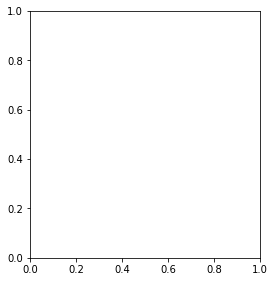

In [53]:
plt.figure(figsize=(14,10))
plt.subplot(2, 3, 1)
plt.plot(hidden_layer, MSE_train_NNR, 'r', label='MSE_train_NNR')
plt.plot(hidden_layer, MSE_val_NNR,'r--', label='MSE_val_NNR')
plt.xlabel('hidden_layer')
plt.ylabel('MSE')
plt.legend(loc='best')

Qua những số liệu trên, ở trường hợp này ta thấy việc thay đổi số tầng ẩn chưa hẳn là tốt, từ 3 tầng trở lên độ lỗi cao. Vì vậy, ta có thể sử dụng 2 tầng ẩn (có MSE val tốt nhất) cho việc huấn luyện sau này.

Tiếp theo, ta sẽ thay đổi số node trên từng tầng ẩn từ 100 đến 1000 để xem MSE val sẽ thay đổi thế nào.

In [41]:
# 1 tầng ẩn với số node thay đổi
MSE_train_NNRs = [] 
MSE_val_NNRs = []
Node = []

for node in range(100, 1100, 100):
    MSE_train_NNR, MSE_val_NNR = train_NNR((node, node), 0.001, 0.0001)
    print node, MSE_train_NNR, MSE_val_NNR
    Node.append(node)
    MSE_train_NNRs.append(MSE_train_NNR)
    MSE_val_NNRs.append(MSE_val_NNR)

100 0.784032777261 1.06416773095
200 0.795430460041 1.07640133887
300 0.815214380172 1.09216089736
400 0.811349099518 1.11351172966
500 1.08923565408 1.23653198307
600 1.06132326026 1.21112648082
700 1.0894514637 1.23043963974
800 1.09127484072 1.23141103171
900 1.09043195079 1.23306057414
1000 1.09482749311 1.23231876558


## Minh họa kết quả thay đổi số node

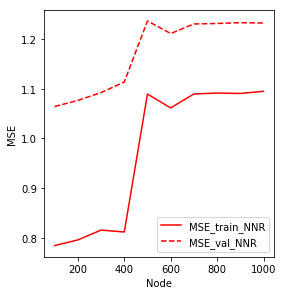

In [42]:
plt.figure(figsize=(14,10))
plt.subplot(2, 3, 2)
plt.plot(Node, MSE_train_NNRs, 'r', label='MSE_train_NNR')
plt.plot(Node, MSE_val_NNRs,'r--', label='MSE_val_NNR')
plt.xlabel('Node')
plt.ylabel('MSE')
plt.legend(loc='best')

Qua những kết quả trên, ta có thể thấy số node càng cao không có nghĩa là độ lỗi sẽ càng nhỏ, không những thế, càng tăng số node thì độ lỗi có vẻ sẽ càng tăng cao hơn nữa. Vì vậy, ta sẽ chọn 100 node (có MSE val bé nhất) để sử dụng cho những mô hình sau.

Kế tiếp, ta sẽ thay đổi giá trị learning rate để xem việc học hội tụ thế nào, ta sẽ giữ nguyên wd, 2 tầng ẩn và mỗi tầng có 100 node.

In [43]:
list_learning_rate = [0.0001, 0.001, 0.01, 0.1]
MSE_train_NNRs = [] 
MSE_val_NNRs = []

for learning_rate in list_learning_rate:
    MSE_train_NNR, MSE_val_NNR = train_NNR((100, 100), learning_rate, 0.0001)
    print learning_rate, MSE_train_NNR, MSE_val_NNR
    MSE_train_NNRs.append(MSE_train_NNR)
    MSE_val_NNRs.append(MSE_val_NNR)

0.0001 1.08571380772 1.22958392215
0.001 0.784032777261 1.06416773095
0.01 0.72623176377 1.08764102396
0.1 1.0948976717 1.23994997835


## Minh họa kết quả thay đổi learning rate

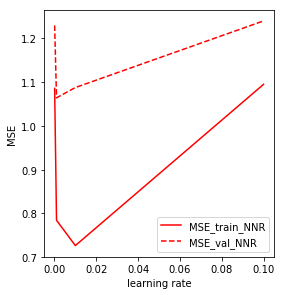

In [44]:
plt.figure(figsize=(14,10))
plt.subplot(2, 3, 2)
plt.plot(list_learning_rate, MSE_train_NNRs, 'r', label='MSE_train_NNR')
plt.plot(list_learning_rate, MSE_val_NNRs,'r--', label='MSE_val_NNR')
plt.xlabel('learning rate')
plt.ylabel('MSE')
plt.legend(loc='best')

Ta thấy ở đây, khi learning rate thấp và cao thì độ lỗi MSE sẽ cao, và chỉ có learning rate vừa phải sẽ giúp cho quá trình học hội tụ nhanh hơn. Khi đó, ta sẽ chọn learning rate có độ lỗi MSE trên tập val thấp nhất là learning rate = 0.001, vì vậy chúng ta sẽ sử dụng learning rate này cho mô hình kế tiếp.

In [45]:
list_alpha = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
MSE_train_NNRs = [] 
MSE_val_NNRs = []

for alpha in list_alpha:
    MSE_train_NNR, MSE_val_NNR = train_NNR((100, 100), 0.001, alpha)
    print alpha, MSE_train_NNR, MSE_val_NNR
    print
    MSE_train_NNRs.append(MSE_train_NNR)
    MSE_val_NNRs.append(MSE_val_NNR)

0.0001 0.784032777261 1.06416773095

0.001 0.784046067204 1.06417038318

0.01 0.784179226599 1.06419718011

0.1 0.785537267733 1.06449269192

1.0 0.785208877859 1.05585583603

10.0 1.08253859696 1.22798436045

100.0 1.09514842093 1.24076499725

1000.0 1.09476535709 1.23945599162

10000.0 1.09443547457 1.23710661008



## Minh họa kết quả thay đổi weight decay

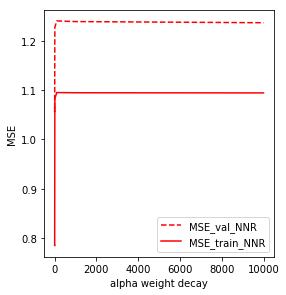

In [46]:
plt.figure(figsize=(14,10))
plt.subplot(2, 3, 2)

plt.plot(list_alpha, MSE_val_NNRs,'r--', label='MSE_val_NNR')
plt.plot(list_alpha, MSE_train_NNRs, 'r', label='MSE_train_NNR')

plt.xlabel('alpha weight decay')
plt.ylabel('MSE')
plt.legend(loc='best')

Qua kết quả trên, ta có thể thấy, khi weight decay ở khoảng nhỏ và lớn sẽ cho độ lỗi MSE lớn. Chỉ có ở weight decay 1.0 thì kết quả nhận được thấp hơn các kết quả khác. Cuối cùng, ta sẽ chọn alpha = 1.0 để tiếp tục train mô hình NNR cuối cùng để kiểm tra.

## Kiểm tra độ lỗi đối với mô hình Linear Regression

In [47]:
MSE_train_LinReg, MSE_val_LinReg = train_LinReg()
print MSE_train_LinReg, MSE_val_LinReg

0.730892130645 1.12880638526


# 3. Xây dựng tập test

In [48]:
test_input_df = test_df.iloc[:, 0:]
test_output_df = test_df.imdb_score

## 3.1. Xây dựng test_X

In [49]:
test_X = process_new_input_df(test_input_df, dropped_cols, mean_mode_dict, X_mean, X_std)
test_X.shape

(1086L, 12L)

In [50]:
test_X = process_genres(test_X)
print test_X.shape

(1086L, 37L)


## 3.2. Xây dựng test_Y

In [51]:
test_output_df.fillna(train_output_df.mean(), inplace=True)
test_Y = test_output_df.values.reshape(-1, 1)
test_Y.shape

(1086L, 1L)

## Tiến hành test mô hình:

Đầu tiên, ta sẽ tiến hành đo MSE trên tập test đối với mô hình Support Vector Regressor

Ở đây, ta sẽ chọn mô hình có MSE trên tập val bé nhất, đó chính là mô hình có epsilon = 0.1, C = 1 và gamma = 0.1

In [52]:
test_SVR = svm.SVR(C=1, kernel='rbf', gamma=0.1)
test_SVR.fit(train_X, train_Y)
MSE_test = mean_squared_error(test_Y, test_SVR.predict(test_X))
print "MSE tren tap test = " + str(MSE_test)

MSE tren tap test = 1.35789735702


In [53]:
print test_Y[:10]
print test_SVR.predict(test_X)[:10]

[[ 5.4]
 [ 5.9]
 [ 4.7]
 [ 3.2]
 [ 5.5]
 [ 8.3]
 [ 7.6]
 [ 6.1]
 [ 7.1]
 [ 6.6]]
[ 5.21436631  6.03287093  5.34802052  5.79720225  5.62703416  6.88447778
  6.57964641  5.50825256  6.16878862  5.61962317]


Sau đó, ta cũng thử test với mô hình Lỉnear Regression

In [54]:
test_LinReg = LinearRegression()
test_LinReg.fit(train_X, train_Y)
MSE_test = mean_squared_error(test_Y, test_LinReg.predict(test_X))
print str(MSE_test)

1.39477959888


In [55]:
print test_Y[:10]
print test_LinReg.predict(test_X)[:10]

[[ 5.4]
 [ 5.9]
 [ 4.7]
 [ 3.2]
 [ 5.5]
 [ 8.3]
 [ 7.6]
 [ 6.1]
 [ 7.1]
 [ 6.6]]
[[ 5.64208691]
 [ 5.90368085]
 [ 5.57242445]
 [ 5.52761426]
 [ 5.95302437]
 [ 6.70573301]
 [ 6.18456015]
 [ 5.94269738]
 [ 6.09711465]
 [ 5.80616595]]


Cuối cùng, ta sẽ sử dụng NNR với 2 tầng ẩn, mỗi tầng có 100 node, learning rate = 0.001, alpha = 1.0.

In [56]:
test_NNR = MLPRegressor(activation='logistic', solver='sgd', random_state=0, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, max_iter=10000, alpha=1.0)
    
test_NNR.fit(test_X, test_Y)

print "Do loi cua NNR tren tap test = " + str(mean_squared_error(test_Y, test_NNR.predict(test_X)))

Do loi cua NNR tren tap test = 1.34389986504


In [60]:
print test_Y[0:10]
print test_NNR.predict(test_X)[0:10]

[[ 5.4]
 [ 5.9]
 [ 4.7]
 [ 3.2]
 [ 5.5]
 [ 8.3]
 [ 7.6]
 [ 6.1]
 [ 7.1]
 [ 6.6]]
[ 6.189507    6.24971177  6.1816676   6.18571588  6.38888552  6.32992835
  6.32082217  6.32864783  6.21886899  6.18289381]
